For these codes I would like to cite the help from the repository from ScarsProject Repository of Dr. Chioquetta : https://github.com/A-Chioquetta/ScarsProject/blob/main/TimeEvol_PXP.py. The main things are used from her code with minor corrections from my side. 

In [3]:
import sys
import os
from numpy import column_stack, savetxt
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import timeit
start = timeit.default_timer()

In [7]:
# Generating the operators for the chain
N = 14
def generate_operators(N):
    si = qeye(2)
    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()
    p = (si - sz) / 2.0

    sx_list = []
    sy_list = []
    sz_list = []
    p_list = []

    for n in range(N):
        op_list = [si] * N

        op_list[n] = sx
        sx_list.append(tensor(op_list))

        op_list[n] = sy
        sy_list.append(tensor(op_list))

        op_list[n] = sz
        sz_list.append(tensor(op_list))

        op_list[n] = p
        p_list.append(tensor(op_list))

    return sx_list, sy_list, sz_list, p_list

Didelities of the fully polarized state, the translated $Z_2$ state, $Z_3$ and $Z_4$ states

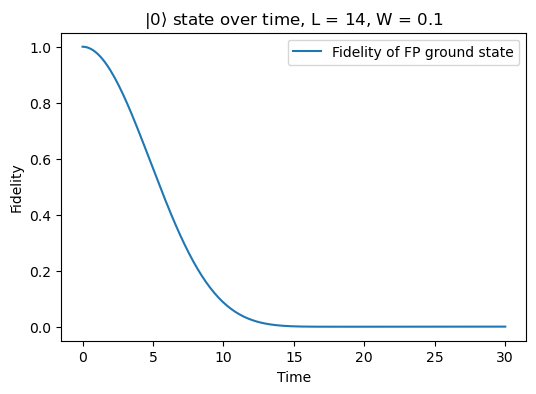

In [12]:
#Hamiltonian PXP
# Parameters
N = 14 # Number of sites
W = 0.1
Bound = 'PBC'  # Boundary conditions (can be PBC or OBC)
sx_list, sy_list, sz_list, p_list = generate_operators(N)

H = 0
for n in range(N - 2):
    H += p_list[n] * sx_list[n + 1] * p_list[n + 2]

# Boundary conditions
if Bound == 'pbc' or Bound == 'PBC':
    H += p_list[N - 2] * sx_list[N - 1] * p_list[0] + p_list[N - 1] * sx_list[0] * p_list[1]  # PBC

if Bound == 'obc' or Bound == 'OBC':
    H += sx_list[0] * p_list[1] + p_list[N - 2] * sx_list[N - 1]  # OBC

# Random uniform distribution of perturbation strength values
# PXP Hamiltonian with perturbation i.e. random zeeman like field in all directions
hw = np.random.uniform(-W / 2, W / 2, (3 * N))
m = 0
for n in range(N):
    H += hw[m] * sx_list[n] + hw[m + 1] * sy_list[n] + hw[m + 2] * sz_list[n]  # Perturbing all directions
    m += 3

# Define the initial ground state
ground_state = tensor([basis(2, 0) for i in range(N)])

# Time evolution parameters
tlist = np.linspace(0, 30, 200)  # Time array, modify as needed

# Evolve the system
result = mesolve(H, ground_state, tlist, [])

# Calculate fidelity with the initial Z2 state
fidelities = [np.abs(ground_state.overlap(state))**2 for state in result.states]

# Plot the fidelity
plt.figure(figsize=(6, 4))
plt.plot(tlist, fidelities, label='Fidelity of FP ground state')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title(r'$|0\rangle$ state over time, L = 14, W = 0.1')
plt.legend()
plt.show()

The fidelity of the translated $Z_{2}$ state

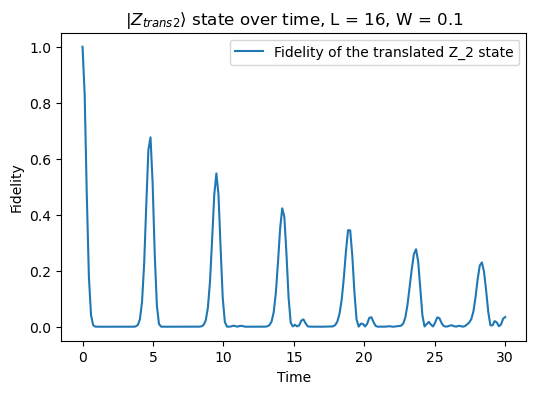

In [19]:
#Hamiltonian PXP
# Parameters
N = 16 # Number of sites
W = 0.1
Bound = 'PBC'  # Boundary conditions (can be PBC or OBC)
sx_list, sy_list, sz_list, p_list = generate_operators(N)

H = 0
for n in range(N - 2):
    H += p_list[n] * sx_list[n + 1] * p_list[n + 2]

# Boundary conditions
if Bound == 'pbc' or Bound == 'PBC':
    H += p_list[N - 2] * sx_list[N - 1] * p_list[0] + p_list[N - 1] * sx_list[0] * p_list[1]  # PBC

if Bound == 'obc' or Bound == 'OBC':
    H += sx_list[0] * p_list[1] + p_list[N - 2] * sx_list[N - 1]  # OBC

# Random uniform distribution of perturbation strength values
# PXP Hamiltonian with perturbation i.e. random zeeman like field in all directions
hw = np.random.uniform(-W / 2, W / 2, (3 * N))
m = 0
for n in range(N):
    H += hw[m] * sx_list[n] + hw[m + 1] * sy_list[n] + hw[m + 2] * sz_list[n]  # Perturbing all directions
    m += 3


# Define the initial translated Z2 state with excitation on every other site, starting with 1
def translated_Z2_state(N):
    return tensor([basis(2, (i + 1) % 2) for i in range(N)])


# Time evolution parameters
tlist = np.linspace(0, 30, 200)  # Time array, modify as needed

# Evolve the system
result = mesolve(H, translated_Z2_state(N), tlist, [])

# Calculate fidelity with the initial Z2 state
fidelities = [np.abs(translated_Z2_state(N).overlap(state))**2 for state in result.states]

# Plot the fidelity
plt.figure(figsize=(6, 4))
plt.plot(tlist, fidelities, label='Fidelity of the translated Z_2 state')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title(r'$|Z_{trans2}\rangle$ state over time, L = 16, W = 0.1')
plt.legend()
plt.show()

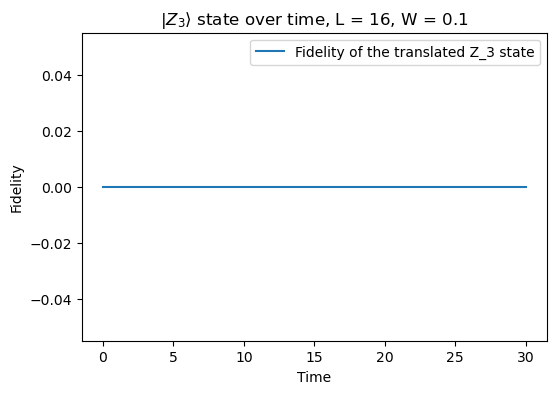

In [21]:
#Hamiltonian PXP
# Parameters
N = 16 # Number of sites
W = 0.6
Bound = 'PBC'  # Boundary conditions (can be PBC or OBC)
sx_list, sy_list, sz_list, p_list = generate_operators(N)

H = 0
for n in range(N - 2):
    H += p_list[n] * sx_list[n + 1] * p_list[n + 2]

# Boundary conditions
if Bound == 'pbc' or Bound == 'PBC':
    H += p_list[N - 2] * sx_list[N - 1] * p_list[0] + p_list[N - 1] * sx_list[0] * p_list[1]  # PBC

if Bound == 'obc' or Bound == 'OBC':
    H += sx_list[0] * p_list[1] + p_list[N - 2] * sx_list[N - 1]  # OBC

# Random uniform distribution of perturbation strength values
# PXP Hamiltonian with perturbation i.e. random zeeman like field in all directions
hw = np.random.uniform(-W / 2, W / 2, (3 * N))
m = 0
for n in range(N):
    H += hw[m] * sx_list[n] + hw[m + 1] * sy_list[n] + hw[m + 2] * sz_list[n]  # Perturbing all directions
    m += 3

# Define the initial Z3 state with pattern 001
Z3_state = tensor([basis(2, (i % 3 == 2)) for i in range(N)])

# Time evolution parameters
tlist = np.linspace(0, 30, 200)  # Time array, modify as needed

# Evolve the system
result = mesolve(H, Z3_state, tlist, [])

# Calculate fidelity with the initial Z2 state
fidelities = [np.abs(Z3_state.overlap(state))**2 for state in result.states]

# Plot the fidelity
plt.figure(figsize=(6, 4))
plt.plot(tlist, fidelities, label='Fidelity of the translated Z_3 state')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title(r'$|Z_{3}\rangle$ state over time, L = 16, W = 0.1')
plt.legend()
plt.show()

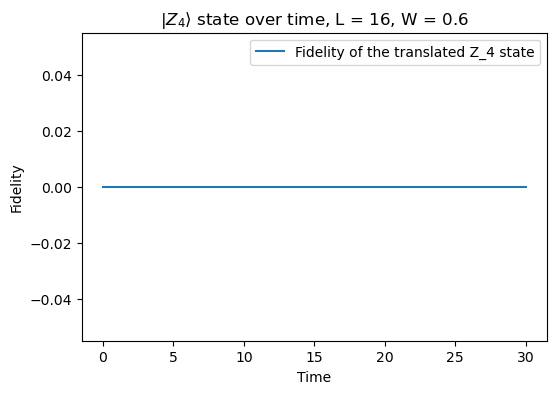

In [23]:
#Hamiltonian PXP
# Parameters
N = 16 # Number of sites
W = 0.6
Bound = 'PBC'  # Boundary conditions (can be PBC or OBC)
sx_list, sy_list, sz_list, p_list = generate_operators(N)

H = 0
for n in range(N - 2):
    H += p_list[n] * sx_list[n + 1] * p_list[n + 2]

# Boundary conditions
if Bound == 'pbc' or Bound == 'PBC':
    H += p_list[N - 2] * sx_list[N - 1] * p_list[0] + p_list[N - 1] * sx_list[0] * p_list[1]  # PBC

if Bound == 'obc' or Bound == 'OBC':
    H += sx_list[0] * p_list[1] + p_list[N - 2] * sx_list[N - 1]  # OBC

# Random uniform distribution of perturbation strength values
# PXP Hamiltonian with perturbation i.e. random zeeman like field in all directions
hw = np.random.uniform(-W / 2, W / 2, (3 * N))
m = 0
for n in range(N):
    H += hw[m] * sx_list[n] + hw[m + 1] * sy_list[n] + hw[m + 2] * sz_list[n]  # Perturbing all directions
    m += 3

# Define the initial Z3 state with pattern 001
Z4_state = tensor([basis(2, (i % 4 == 3)) for i in range(N)])

# Time evolution parameters
tlist = np.linspace(0, 30, 200)  # Time array, modify as needed

# Evolve the system
result = mesolve(H, Z4_state, tlist, [])

# Calculate fidelity with the initial Z2 state
fidelities = [np.abs(Z4_state.overlap(state))**2 for state in result.states]

# Plot the fidelity
plt.figure(figsize=(6, 4))
plt.plot(tlist, fidelities, label='Fidelity of the translated Z_4 state')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title(r'$|Z_{4}\rangle$ state over time, L = 16, W = 0.6')
plt.legend()
plt.show()

In [24]:
# Define the initial Z2 state with excitation on every other site
def Z2_state(N):
    return tensor([basis(2, i % 2) for i in range(N)])

# Define the translated Z2 state with excitation on every other site, but shifted
def translated_Z2_state(N):
    return tensor([basis(2, (i + 1) % 2) for i in range(N)])

# Create the superposition of Z2 and translated Z2 states
def superposition_Z2_translated_Z2(N):
    Z2 = Z2_state(N)
    translated_Z2 = translated_Z2_state(N)
    superposition = (Z2 + translated_Z2).unit() / np.sqrt(2)
    return superposition

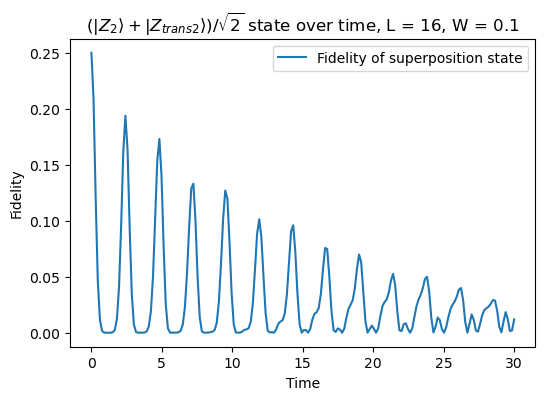

In [29]:
#Hamiltonian PXP
# Parameters
N = 16 # Number of sites
W = 0.1
Bound = 'PBC'  # Boundary conditions (can be PBC or OBC)
sx_list, sy_list, sz_list, p_list = generate_operators(N)

H = 0
for n in range(N - 2):
    H += p_list[n] * sx_list[n + 1] * p_list[n + 2]

# Boundary conditions
if Bound == 'pbc' or Bound == 'PBC':
    H += p_list[N - 2] * sx_list[N - 1] * p_list[0] + p_list[N - 1] * sx_list[0] * p_list[1]  # PBC

if Bound == 'obc' or Bound == 'OBC':
    H += sx_list[0] * p_list[1] + p_list[N - 2] * sx_list[N - 1]  # OBC

# Random uniform distribution of perturbation strength values
# PXP Hamiltonian with perturbation i.e. random zeeman like field in all directions
hw = np.random.uniform(-W / 2, W / 2, (3 * N))
m = 0
for n in range(N):
    H += hw[m] * sx_list[n] + hw[m + 1] * sy_list[n] + hw[m + 2] * sz_list[n]  # Perturbing all directions
    m += 3

# Time evolution parameters
tlist = np.linspace(0, 30, 200)  # Time array, modify as needed

# Evolve the system
result = mesolve(H, superposition_Z2_translated_Z2(N), tlist, [])

# Calculate fidelity with the initial Z2 state
fidelities = [np.abs(superposition_Z2_translated_Z2(N).overlap(state))**2 for state in result.states]

# Plot the fidelity
plt.figure(figsize=(6, 4))
plt.plot(tlist, fidelities, label='Fidelity of superposition state')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title(r'$(|Z_{2}\rangle + |Z_{trans2}\rangle)/\sqrt{2}$ state over time, L = 16, W = 0.1')
plt.legend()
plt.show()

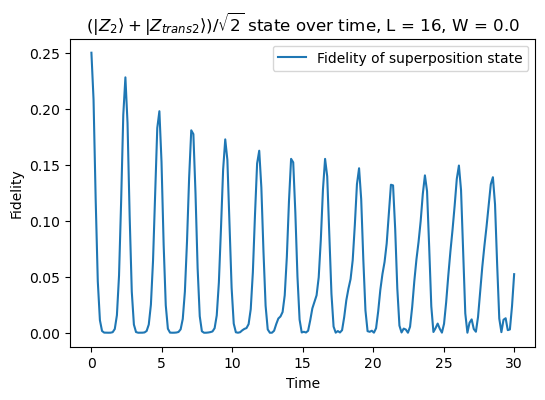

In [28]:
#Hamiltonian PXP
# Parameters
N = 16 # Number of sites
W = 0.0
Bound = 'PBC'  # Boundary conditions (can be PBC or OBC)
sx_list, sy_list, sz_list, p_list = generate_operators(N)

H = 0
for n in range(N - 2):
    H += p_list[n] * sx_list[n + 1] * p_list[n + 2]

# Boundary conditions
if Bound == 'pbc' or Bound == 'PBC':
    H += p_list[N - 2] * sx_list[N - 1] * p_list[0] + p_list[N - 1] * sx_list[0] * p_list[1]  # PBC

if Bound == 'obc' or Bound == 'OBC':
    H += sx_list[0] * p_list[1] + p_list[N - 2] * sx_list[N - 1]  # OBC

# Random uniform distribution of perturbation strength values
# PXP Hamiltonian with perturbation i.e. random zeeman like field in all directions
hw = np.random.uniform(-W / 2, W / 2, (3 * N))
m = 0
for n in range(N):
    H += hw[m] * sx_list[n] + hw[m + 1] * sy_list[n] + hw[m + 2] * sz_list[n]  # Perturbing all directions
    m += 3

# Time evolution parameters
tlist = np.linspace(0, 30, 200)  # Time array, modify as needed

# Evolve the system
result = mesolve(H, superposition_Z2_translated_Z2(N), tlist, [])

# Calculate fidelity with the initial Z2 state
fidelities = [np.abs(superposition_Z2_translated_Z2(N).overlap(state))**2 for state in result.states]

# Plot the fidelity
plt.figure(figsize=(6, 4))
plt.plot(tlist, fidelities, label='Fidelity of superposition state')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title(r'$(|Z_{2}\rangle + |Z_{trans2}\rangle)/\sqrt{2}$ state over time, L = 16, W = 0.0')
plt.legend()
plt.show()

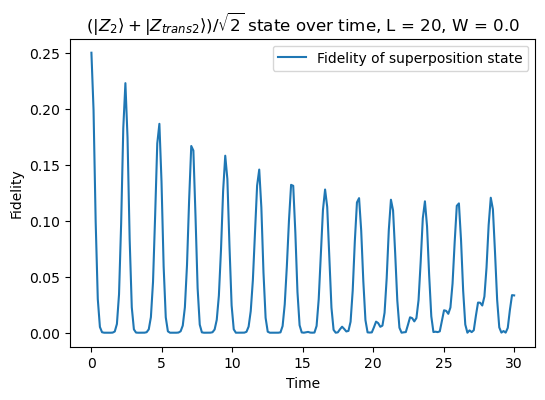

In [30]:
#Hamiltonian PXP
# Parameters
N = 20 # Number of sites
W = 0.0
Bound = 'PBC'  # Boundary conditions (can be PBC or OBC)
sx_list, sy_list, sz_list, p_list = generate_operators(N)

H = 0
for n in range(N - 2):
    H += p_list[n] * sx_list[n + 1] * p_list[n + 2]

# Boundary conditions
if Bound == 'pbc' or Bound == 'PBC':
    H += p_list[N - 2] * sx_list[N - 1] * p_list[0] + p_list[N - 1] * sx_list[0] * p_list[1]  # PBC

if Bound == 'obc' or Bound == 'OBC':
    H += sx_list[0] * p_list[1] + p_list[N - 2] * sx_list[N - 1]  # OBC

# Random uniform distribution of perturbation strength values
# PXP Hamiltonian with perturbation i.e. random zeeman like field in all directions
hw = np.random.uniform(-W / 2, W / 2, (3 * N))
m = 0
for n in range(N):
    H += hw[m] * sx_list[n] + hw[m + 1] * sy_list[n] + hw[m + 2] * sz_list[n]  # Perturbing all directions
    m += 3

# Time evolution parameters
tlist = np.linspace(0, 30, 200)  # Time array, modify as needed

# Evolve the system
result = mesolve(H, superposition_Z2_translated_Z2(N), tlist, [])

# Calculate fidelity with the initial Z2 state
fidelities = [np.abs(superposition_Z2_translated_Z2(N).overlap(state))**2 for state in result.states]

# Plot the fidelity
plt.figure(figsize=(6, 4))
plt.plot(tlist, fidelities, label='Fidelity of superposition state')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title(r'$(|Z_{2}\rangle + |Z_{trans2}\rangle)/\sqrt{2}$ state over time, L = 20, W = 0.0')
plt.legend()
plt.show()